## Using FFT to calculate function's derivatives

Let's consider the following example:

$$
f(t) = \cos(t)e^{-\frac{t^2}{25}},
$$

for which true derivative is

$$
\frac{d}{dt}f(t) = -\sin(t)e^{-\frac{t^2}{25}} - \frac{2}{25}t\cos(t)e^{-\frac{t^2}{25}} = -\sin(t)e^{-\frac{t^2}{25}} - \frac{2}{25}tf(t).
$$

One may use a numerical approximation by _**finite differences**_:

$$
\frac{d}{dt}f(t) \approx \frac{f(t+h)-f(t)}{h}.
$$

However, using FFT is more efficient.

Let's beging with loading necessary packages and defining functions.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# a function of interest
def fcn(t):
    return np.cos(t)*np.exp(-t**2 / 25)

# derivative of f(t)
def fcn_prime(t):
    return - np.sin(t)*np.exp(-t**2 / 25) - 2/25*t*fcn(t)

# derivative of f(t) by finite differences
def fcn_prime_fd(t):
    n = len(t)
    result = np.zeros(n-1)
    for i in np.arange(n-1):
        h = t[i+1] - t[i]
        result[i] = (fcn(t[i] + h) - fcn(t[i])) / h

    return result    

# derivative of f(t) by FFT
def fcn_prime_fft(t):
    f = fcn(t)
    N = len(f)
    dt = t[1] - t[0]

    # applying FFT
    fhat = np.fft.fft(f)

    # calculating kappa
    kappa = (2*np.pi / (N * dt)) * np.arange(-N/2, N/2)
    kappa = np.fft.fftshift(kappa)

    # FFT of the f'(t)
    fhat_prime = (1j) * kappa * fhat

    # inverse FFT to obtain f'(t)
    return np.real(np.fft.ifft(fhat_prime))

Now, let us calculate derivatives of $f(t)$ on the interval $\left[-\frac{L}{2}, \frac{L}{2}\right]$. 

In [46]:
L = 30    # interval [-15, 15]
N = 128   # number of points on the interval
dt = L/N  # spacing between points within the interval
t = np.arange(-L/2, L/2, dt)

f1 = fcn_prime(t)
f2 = fcn_prime_fd(t)
f3 = fcn_prime_fft(t)

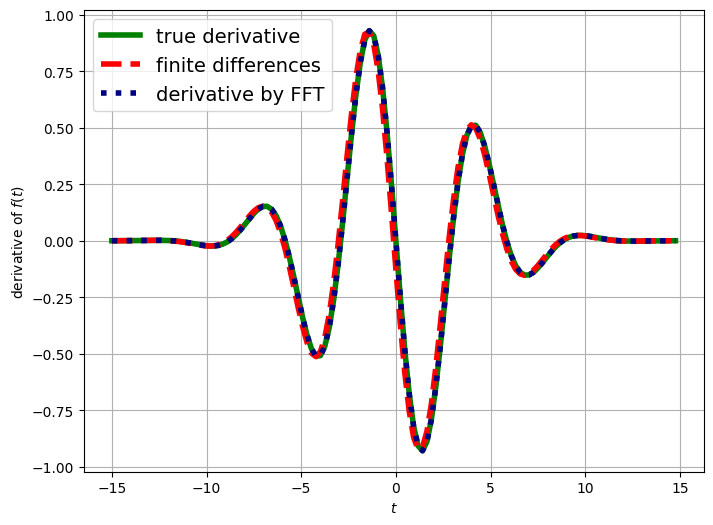

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(t, f1, label = "true derivative", color = "green", linewidth = 4)
plt.plot(t[:-1], f2, label = "finite differences", color = "red", linewidth = 4, linestyle="--")
plt.plot(t, f3, label = "derivative by FFT", color = "navy", linewidth = 4, linestyle = ":")
plt.xlabel(r"$t$")
plt.ylabel(r"derivative of $f(t)$")
plt.legend(loc="upper left", fontsize=14)
plt.grid()
plt.savefig("figures/lecture03-ex03a.png", dpi = 300)

Let's estimate errors versus $N$.

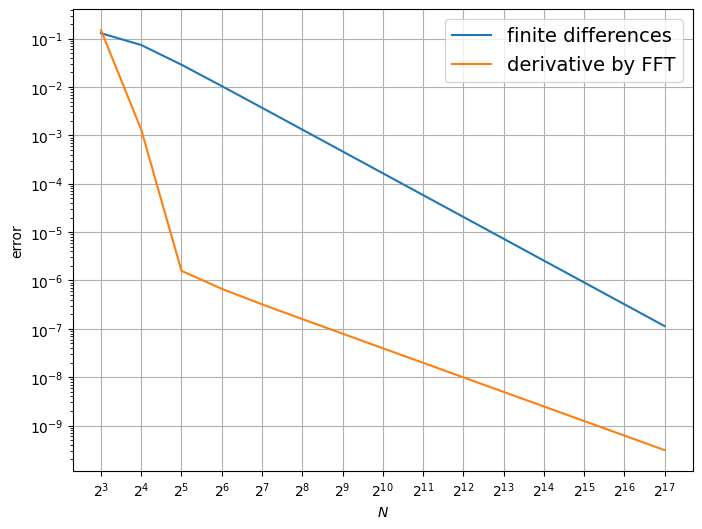

In [84]:
p = np.arange(3, 18)
error21 = []
error31 = []
for N in 2 ** p:
    dt = L/N  
    t = np.arange(-L/2, L/2, dt)

    f1 = fcn_prime(t)
    f2 = fcn_prime_fd(t)
    f3 = fcn_prime_fft(t)

    error21.append(np.linalg.norm(f2 - f1[:-1]) / N)
    error31.append(np.linalg.norm(f3 - f1) / N)

plt.figure(figsize=(8, 6))
plt.plot(p, np.array(error21), label="finite differences")
plt.plot(p, np.array(error31), label="derivative by FFT")
plt.xticks(p, [rf"$2^{{{n}}}$" for n in p])
plt.grid()
plt.semilogy()
plt.xlabel(r"$N$")
plt.ylabel("error")
plt.legend(loc="upper right", fontsize=14)
plt.savefig("figures/lecture03-ex03b.png", dpi = 300)
